<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/Telecomm_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Telecom Data Churn Analysis

##Data Exploration

Importing the libraries

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [611]:
tel_df= pd.read_csv("/content/Raw_Telecom_Dataset.csv")
tel_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [612]:
tel_df.shape

(7043, 21)

In [613]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [614]:
tel_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [615]:
tel_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Visualizing Total Count plot of Churn Column.

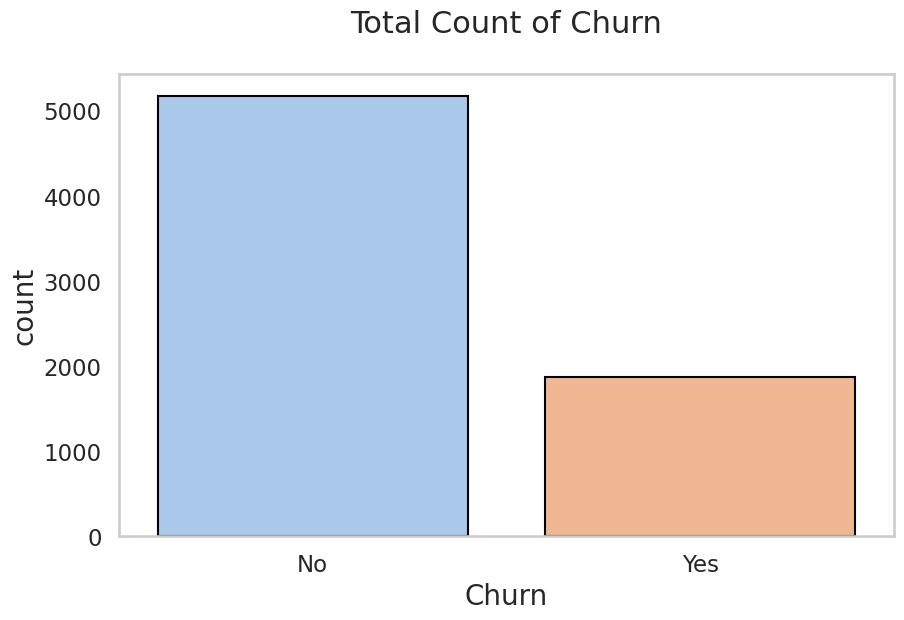

In [616]:
plt.figure(figsize= (10,6))
sns.set_palette("pastel")
sns.countplot(x= "Churn", data= tel_df, edgecolor= 'black', hue= 'Churn')
plt.grid(False)
plt.title("Total Count of Churn")
plt.show()

Calculating the Percentage of Churn Column.

In [617]:
total_churn_per= 100*tel_df["Churn"].value_counts()/len(tel_df["Churn"])
total_churn_per

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [618]:
total_churn= tel_df["Churn"].value_counts()
total_churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Visualizing the Percentage of Missing Values if Any.

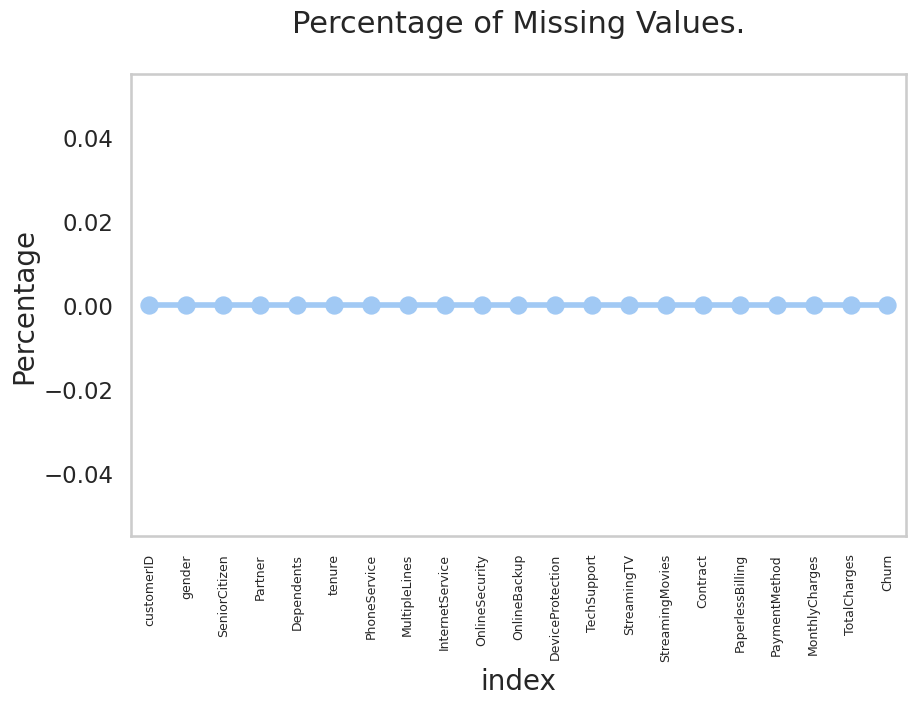

In [619]:
plt.figure(figsize=(10, 6))
missing= pd.DataFrame((tel_df.isnull().sum())*100/tel_df.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data= missing )
plt.xticks(rotation=90, fontsize= 9)
plt.title("Percentage of Missing Values.")
plt.ylabel("Percentage")
plt.grid(False)
plt.show()

##Data Cleaning

In [620]:
tel_df_copy= tel_df.copy()

 Total Charges column must be of numeric datatype rather than object datatype. Therefore converting it into numeric datatype.

In [621]:
tel_df_copy.TotalCharges= pd.to_numeric(tel_df_copy.TotalCharges, errors= "coerce")
tel_df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [622]:
tel_df_copy.loc[tel_df["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [623]:
(11/7043)*100 #mis_value_recs/total_recs x 100

0.1561834445548772

Since the % of these records compared to the total dataset is very low. i.e., 0.15%. It is safe to ignore them from further processing.

In [624]:
tel_df_copy.dropna(how = 'any', inplace = True)

Dividing the customers into different tenure groups, tenure column is in month form, therefore dividing them into the bins of 12 months.

In [625]:
print(tel_df_copy["tenure"].max())

72


In [626]:
label= ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]

In [627]:
tel_df_copy["tenure_group"]= pd.cut(tel_df_copy.tenure, range(1, 80, 12), right=False, labels= label)
tel_df_copy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Dropping unnecessary columns from the code.

In [628]:
tel_df_copy.drop(columns=["customerID", "tenure"], axis=1, inplace= True)
tel_df_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


##Data Exploration

**Univariate Analysis**

In [629]:
tel_df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

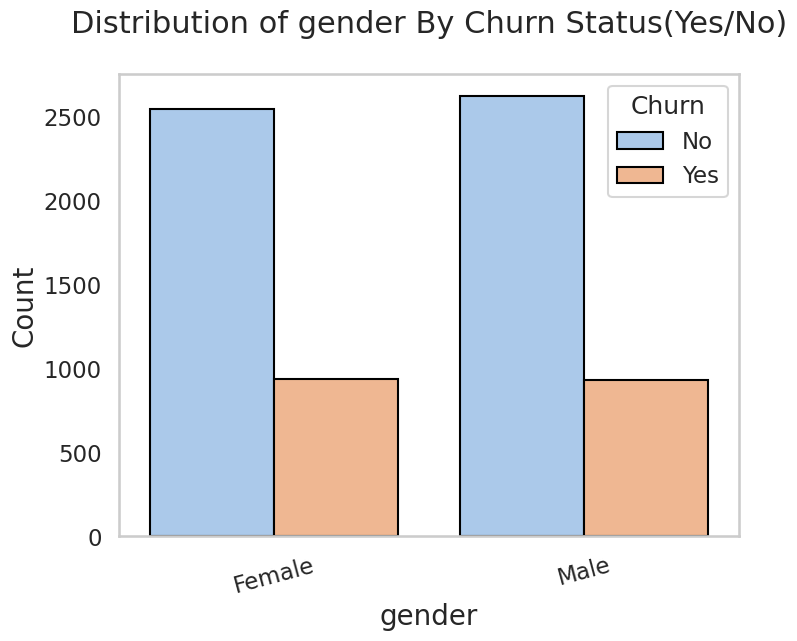

<Figure size 640x480 with 0 Axes>

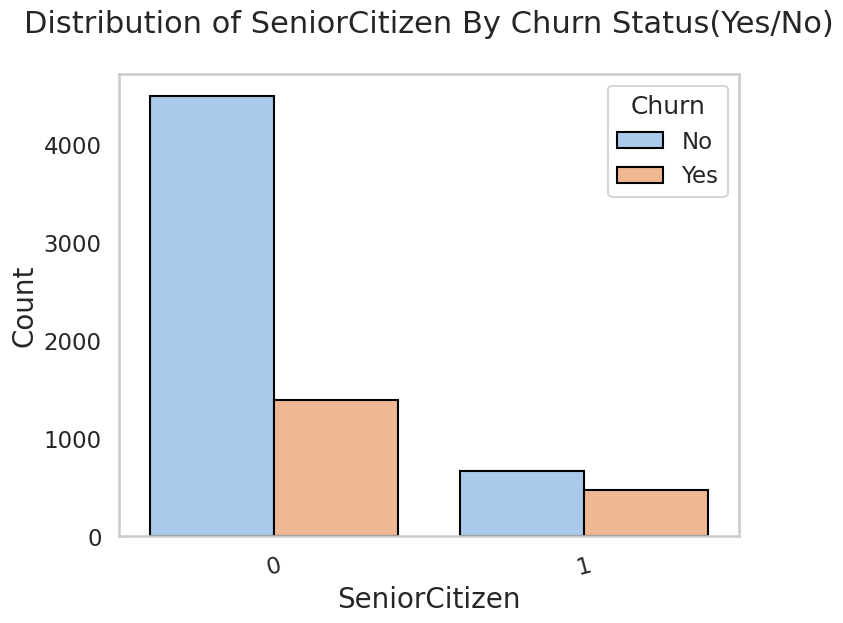

<Figure size 640x480 with 0 Axes>

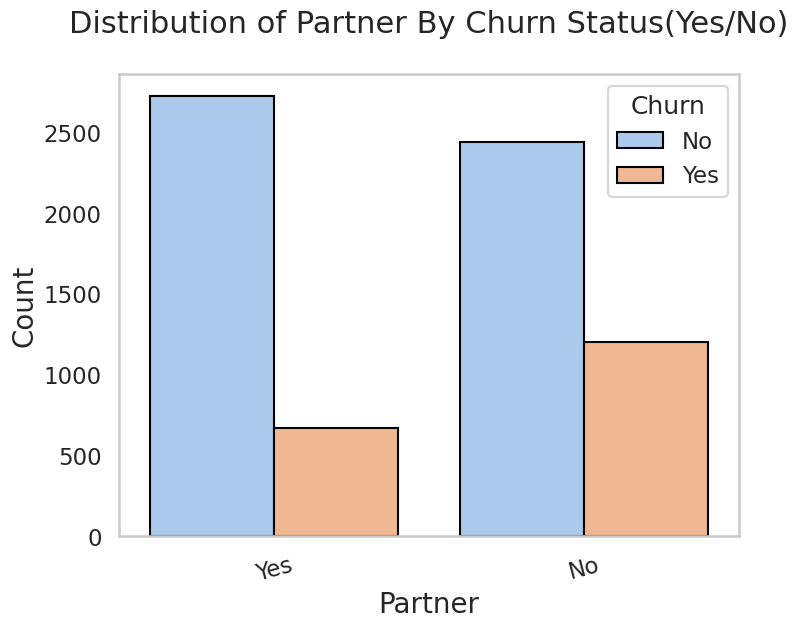

<Figure size 640x480 with 0 Axes>

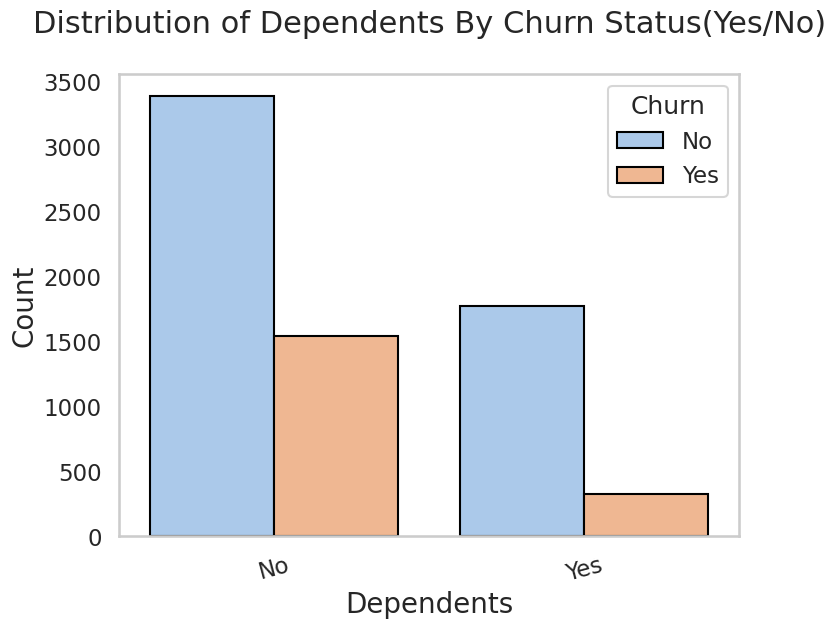

In [ ]:
sns.set_palette("pastel")
for i, predictor in enumerate(tel_df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(figsize= (8, 6))
    sns.countplot(data=tel_df_copy, x=predictor, hue='Churn',edgecolor='black' )
    plt.xticks(rotation= 15)
    plt.ylabel("Count")
    plt.xlabel(f"{predictor}")
    plt.title(f"Distribution of {predictor} By Churn Status(Yes/No)")
    plt.grid(False)
    plt.show()
    plt.clf()
    print()

Converting the target vaiable 'Churn' into binary numeric i.e., Yes= 1 & No= 0

In [ ]:
tel_df_copy['Churn'] = np.where(tel_df_copy.Churn == 'Yes',1,0)
tel_df_copy

In [ ]:
tel_df_copy["Churn"].value_counts()

Converting all the categorial variables into **dummy variables**, to transforming categorical data into a format that can be provided to machine learning algorithms to do a better job in prediction. This process is known as "**one-hot encoding**".

In [ ]:
tel_df_dummies = pd.get_dummies(tel_df_copy)
tel_df_dummies.columns

Relationship between Monthly Charges and Total Charges

In [ ]:
sns.lmplot(data=tel_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False, palette= "blue")
plt.grid(False)
plt.show()

Total Charges increases as Monthly Charges increases (as expected).

Churn by Monthly Charges and Total Charges

In [ ]:
plt.figure(figsize= (8, 6))
sns.set_palette("bright")
monthly_charges = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 0) ], edgecolor = "black", fill = True)
monthly_charges = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 1) ], ax =monthly_charges ,edgecolor = "black", fill= True)

monthly_charges.legend(["No Churn","Churn"],loc='upper right')
monthly_charges.set_ylabel('Density')
monthly_charges.set_xlabel('Monthly Charges')
monthly_charges.set_title('Monthly Charges by Churn')
plt.grid(False)
plt.show()

**Insight:** Churn is high when Monthly Charges are high.

In [ ]:
plt.figure(figsize= (8, 6))
total = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 0) ], edgecolor = "black", fill = True)
total = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 1) ], ax =total,edgecolor = "black", fill= True)

total.legend(["No Churn","Churn"],loc='upper right')
total.set_ylabel('Density')
total.set_xlabel('Total Charges')
total.set_title('Total Charges by Churn')
plt.grid(False)
plt.show()

**Insight:** Surprisingly, Higher Churn at lower Total Charges



However, when we consider the insights from three parameters—Tenure, Monthly Charges, and Total Charges—the picture becomes clearer: higher monthly charges with shorter tenures result in lower total charges. Consequently, these three factors—higher monthly charges, shorter tenures, and lower total charges—are associated with high churn.

Building a corelation of all predictors with 'Churn'.

In [ ]:
sns.set_palette("pastel")
plt.figure(figsize=(18, 8))
tel_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.grid(False)
plt.show()

Derived Insight:

1. **HIGH Churn** seen in case of **Month to month contracts**, **No online security**, **No Tech support, First year of subscription** and **Fibre Optics Internet**.

2. **LOW Churn** is seen in case of **Long term contracts**, **Subscriptions without internet service** and **Customers engaged for 5+ years**.

3. Factors like **Gender, Availability of PhoneService** and **No. of multiple lines** have almost **NO impact on Churn**.

It can also be evident from the **HeatMap** below.

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tel_df_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [ ]:
new_df1_target0= tel_df_copy.loc[tel_df_copy["Churn"]==0]
new_df1_target1= tel_df_copy.loc[tel_df_copy["Churn"]==1]


In [ ]:
new_df1_target1["Partner"].value_counts()


In [ ]:
def uniplot(df,col,title,hue =None):

  plt.figure(figsize= (8, 6))
  sns.set_palette("pastel")
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp = pd.Series(data = hue)
  fig, ax = plt.subplots()
  width = len(df[col].unique()) + 7 + 4*len(temp.unique())
  fig.set_size_inches(width , 8)
  plt.xticks(rotation=45)
  plt.title(title)


  ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue, edgecolor= "black")
  ax.set_yscale('log')
  plt.show()

In [ ]:
uniplot(new_df1_target1, col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaperlessBilling',title='Distribution of Paperless Billing for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='StreamingTV',title='Distribution of Streaming TV for Churned Customers',hue='gender')

#Conclusion

These are some of the quick insights from EDA performed on the data set:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
5. Streaming TV, Paperless Billing users usually don't churn



Saving Final Cleaned .csv file for further Model Building.

In [ ]:
tel_df_dummies.to_csv('Cleaned_Telecom_Dataset.csv')